In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train=pd.read_csv("/content/training.csv")
validation=pd.read_csv('/content/validation.csv')
test=pd.read_csv("/content/test.csv")
print(test.head())
print(train.head())
print(validation.head())

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cra

In [ ]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


tokenization

In [ ]:
def tokenization(inputs):
    return word_tokenize(inputs)
train['text_tokenized'] = train['text'].apply(tokenization)
validation['text_tokenized'] = validation['text'].apply(tokenization)

stopwords removal

In [ ]:
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

train['text_stop'] = train['text_tokenized'].apply(stopwords_remove)
validation['text_stop'] = validation['text_tokenized'].apply(stopwords_remove)

train.head()

,text,label,description,text_tokenized,text_stop
0,i didnt feel humiliated,0,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,3,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,3,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]"


lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

train['text_lemmatized'] = train['text_stop'].apply(lemmatization)
validation['text_lemmatized'] = validation['text_stop'].apply(lemmatization)

train.head()

,text,label,description,text_tokenized,text_stop,text_lemmatized
0,i didnt feel humiliated,0,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,0,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so..."
2,im grabbing a minute to post i feel greedy wrong,3,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,3,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]"


joining lemmatized sentences

In [ ]:
train['text_cleaned'] = train['text_lemmatized'].str.join(' ')
validation['text_cleaned'] = validation['text_lemmatized'].str.join(' ')

train.head()

,text,label,description,text_tokenized,text_stop,text_lemmatized,text_cleaned
0,i didnt feel humiliated,0,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]",didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,0,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so...",go feel hopeless damn hopeful around someone c...
2,im grabbing a minute to post i feel greedy wrong,3,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]",im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still...",ever feel nostalgic fireplace know still property
4,i am feeling grouchy,3,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]",feel grouchy


making a word cloud

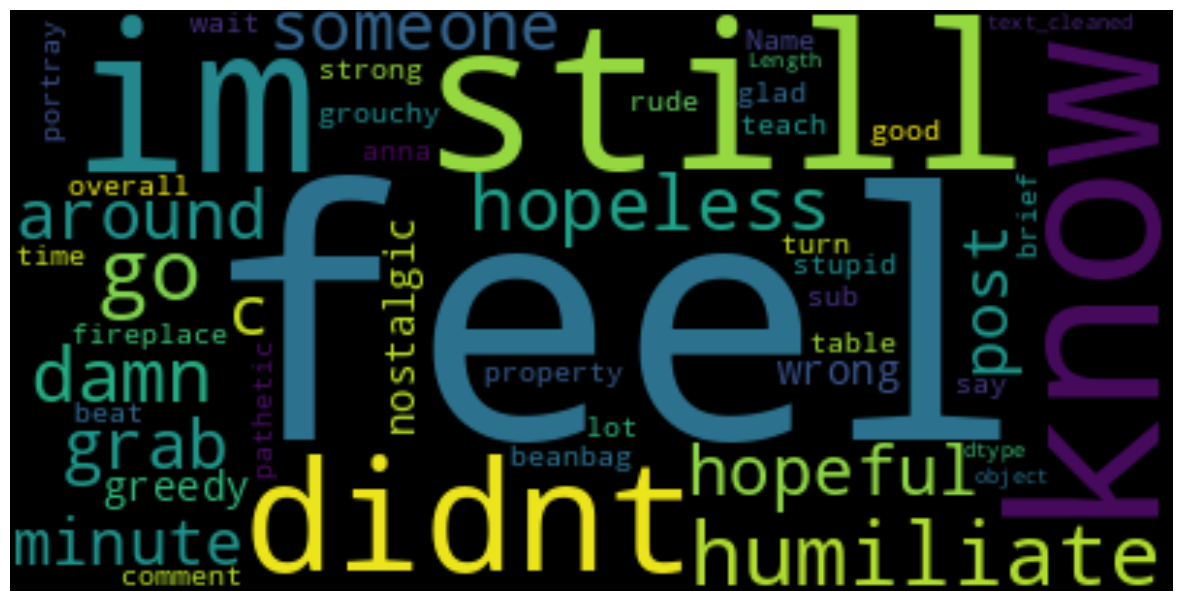

In [ ]:
from wordcloud import WordCloud
WordCloud = WordCloud(max_words=100,
                      random_state=30,
                      collocations=True).generate(str((train['text_cleaned'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
train['label'].value_counts()


1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [ ]:
def word_count(df):
    word_count = []
    for i in df['text']:
        word = i.split()
        word_count.append(len(word))
    return word_count
train['word_count'] = word_count(train)
test['word_count']=word_count(test)
validation['word_count']=word_count(validation)

In [ ]:
train.head()

,text,label,description,text_tokenized,text_stop,text_lemmatized,text_cleaned,word_count
0,i didnt feel humiliated,0,sadness,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]",didnt feel humiliate,4
1,i can go from feeling so hopeless to so damned...,0,sadness,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so...",go feel hopeless damn hopeful around someone c...,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]",im grab minute post feel greedy wrong,10
3,i am ever feeling nostalgic about the fireplac...,2,love,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still...",ever feel nostalgic fireplace know still property,18
4,i am feeling grouchy,3,anger,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]",feel grouchy,4


In [ ]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')
test.head()

,text,label,word_count,text_tokenized,text_stop,text_lemmatized,text_cleaned
0,im feeling rather rotten so im not very ambiti...,0,11,"[im, feeling, rather, rotten, so, im, not, ver...","[im, feeling, rather, rotten, im, ambitious, r...","[im, feel, rather, rotten, im, ambitious, right]",im feel rather rotten im ambitious right
1,im updating my blog because i feel shitty,0,8,"[im, updating, my, blog, because, i, feel, shi...","[im, updating, blog, feel, shitty]","[im, update, blog, feel, shitty]",im update blog feel shitty
2,i never make her separate from me because i do...,0,22,"[i, never, make, her, separate, from, me, beca...","[never, make, separate, ever, want, feel, like...","[never, make, separate, ever, want, feel, like...",never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,1,21,"[i, left, with, my, bouquet, of, red, and, yel...","[left, bouquet, red, yellow, tulips, arm, feel...","[leave, bouquet, red, yellow, tulips, arm, fee...",leave bouquet red yellow tulips arm feel sligh...
4,i was feeling a little vain when i did this one,0,11,"[i, was, feeling, a, little, vain, when, i, di...","[feeling, little, vain, one]","[feel, little, vain, one]",feel little vain one


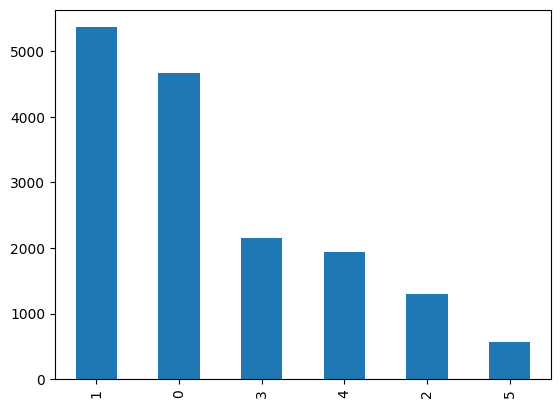

In [ ]:
train["label"].value_counts().plot.bar()
plt.show()


using word count for featurization and decision tree classifier for prediction


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train.label)
y_test = le.transform(test.label)
X = train['word_count'].values.reshape(-1,1)
X_test = test['word_count'].values.reshape(-1,1)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 5,max_depth=4,splitter='best')
clf.fit(X,y_train)
y_preds = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_preds)
print(acc_score)

0.3515


using word count for featurization and logistic regression for prediction


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.3)
lr.fit(X,y_train)
y_preds = lr.predict(X_test)
acc_lr_score = accuracy_score(y_test,y_preds)
print(acc_lr_score)

0.3495


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


using count vectorisation for featurization and decision tree classifier for prediction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_vec = vect.fit_transform(train['text_cleaned'])
X_test_vec = vect.transform(test['text_cleaned'])

clf.fit(X_vec,y_train)
y_preds = clf.predict(X_test_vec)
acc_score=accuracy_score(y_test, y_preds)
print(acc_score)

0.356


using count vectorisation for featurization and random forest classifier for prediction


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf=RandomForestClassifier()
rf.fit(X_vec,y_train)
y_preds=rf.predict(X_test_vec)
acc_score=accuracy_score(y_test,y_preds)
print(acc_score)


0.863


using count vectorisation for featurization and XGboost for prediction


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_vec,y_train)
y_preds = model.predict(X_test_vec)
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_preds)
print(acc_score)

0.875


using TFIDF for featurization and XGB for prediction


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tf = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
X_vec_tf = vect_tf.fit_transform(train['text_cleaned'])
X_test_vec_tf = vect_tf.transform(test['text_cleaned'])
model.fit(X_vec_tf,y_train)
y_preds = model.predict(X_test_vec_tf)
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_preds)
print(acc_score)

0.8655


using TFIDF for featurization and Random forest classifier for prediction


In [ ]:
rf.fit(X_vec_tf,y_train)
y_preds = rf.predict(X_test_vec_tf)
#from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_preds)
print(acc_score)

0.8705


In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model.fit(X_vec_tf, y_train)
model.predict(X_test_vec_tf)
acc_score=accuracy_score(y_test,y_preds)
print(acc_score)

0.8705


Best case was with count vectorization and XGB so using that for further prediction

In [ ]:
# Assuming you have a trained XGBoost model (model) and a TF-IDF vectorizer (vect_tf) used for training

def predict_sentiment(text, model, vectorizer):
    # Preprocess and vectorize the user input text
    text_vectorized = vect_tf.transform([text])

    # Make predictions using the model
    sentiment = model.predict(text_vectorized)

    return sentiment

# Example usage:
user_input = str(input("Enter the text:"))
predicted_sentiment = predict_sentiment(user_input, model, vect_tf)
print("Predicted Sentiment:", predicted_sentiment)

Enter the text:Samyak is mad


NameError: name 'model' is not defined